# perfplot: Performance plots for Python code snippets
- to compare different NumPy array concatenation methods

In [1]:
import numpy as np
import perfplot  # !pip install perfplot

Output()

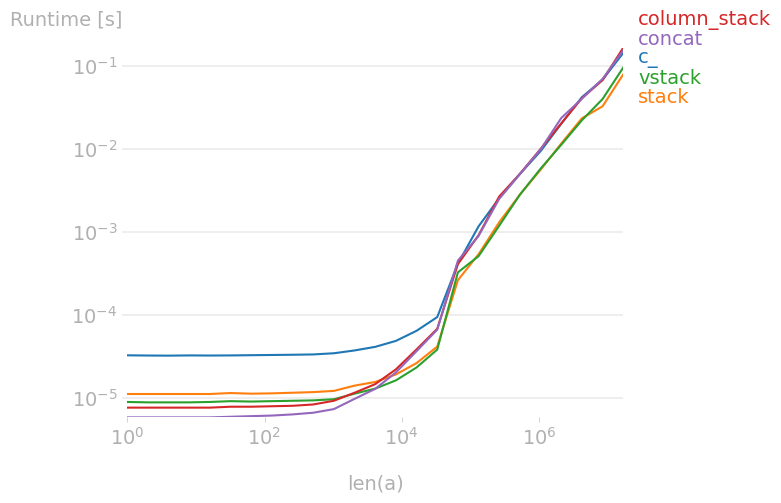

In [5]:
# Solution 1
perfplot.show(
    setup=lambda n: np.random.rand(n),  # or setup=np.random.rand
    kernels=[
        lambda a: np.c_[a, a],
        lambda a: np.stack([a, a]).T,
        lambda a: np.vstack([a, a]).T,
        lambda a: np.column_stack([a, a]),
        lambda a: np.concatenate([a[:, None], a[:, None]], axis=1),
    ],
    labels=["c_", "stack", "vstack", "column_stack", "concat"],
    n_range=[2**k for k in range(25)],
    xlabel="len(a)",
)

Output()

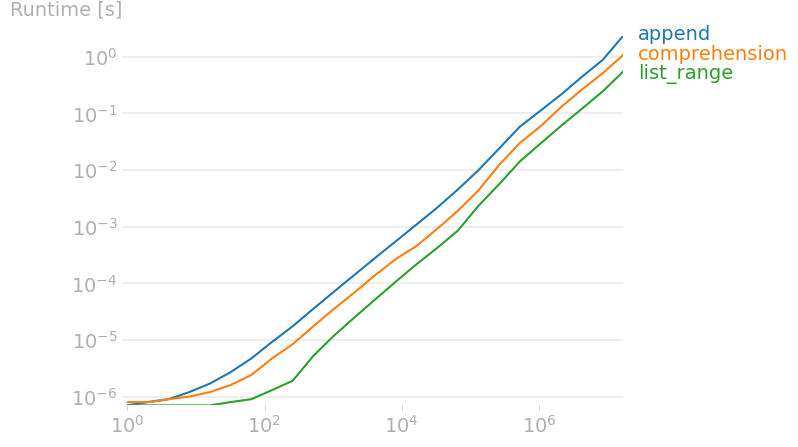

In [6]:
# Solution 2
def append(n):
    l = []
    for i in range(n):
        l.append(i)
    return l


def comprehension(n):
    return [i for i in range(n)]


def list_range(n):
    return list(range(n))


perfplot.show(
    setup=lambda n: n,
    kernels=[
        append,
        comprehension,
        list_range,
    ],
    n_range=[2**k for k in range(25)],
)